In [18]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import os
import numpy as np
import cantera as ct

import matplotlib.pyplot as plt
WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/GMNHIS/gmnhis/scripts/plotting/presentation.mplstyle')

In [2]:
gas = ct.Solution('gri30.cti')
gas.TPX = 1250, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

In [3]:
# Initial temperatures
Temperature_range = list(range(900, 1700, 100))

# Specify the number of time steps and the time step size
nt = 1000000
dt = 1.e-4  # s

# Storing auto ignitions
auto_ignitions = []

In [4]:
for index, Temperature in enumerate(Temperature_range):
    #################################################################
    # Initial temperature, Pressure and stoichiometry
    gas.TPX = Temperature, 10.*ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
    # Create the batch reactor
    r = ct.IdealGasReactor(gas)
    # Now create a reactor network consisting of the single batch reactor
    sim = ct.ReactorNet([r])
    # Storage space
    mfrac = []
    # ...
    time = []
    temperature = []
    HR = []
    # Run the simulation
    # Initial simulation time
    current_time = 0.0
    # Loop for nt time steps of dt seconds.
    for n in range(nt):
        current_time += dt
        sim.advance(current_time)
        time.append(current_time)
        temperature.append(r.T)
        mfrac.append(r.thermo.Y)
        HR.append(- np.dot(gas.net_production_rates, gas.partial_molar_enthalpies))
    #################################################################
    # Catch the autoignition timing
    #################################################################
    # Get the ignition delay time by the maximum value of the Heat Release rate
    auto_ignition = time[HR.index(max(HR))]
    print('For T = ' + str(Temperature) + ', Autoignition time = ' + str(auto_ignition) + ' s')
    # Posterity
    FinalTemp = temperature[nt - 1]
    auto_ignitions.append(auto_ignition)
    
    
    # #################################################################
    # # Save results
    # #################################################################
    # # write output CSV file for importing into Excel
    # csv_file = '3-Output/Phi-1_P-1_T-' + str(Temperature) + '_UV.csv'
    # with open(csv_file, 'w') as outfile:
    # writer = csv.writer(outfile)
    # writer.writerow(['Auto ignition time [s]', 'Final Temperature [K]'] + gas.species_names)
    # writer.writerow([auto_ignition, FinalTemp] + list(mfrac[:]))
    # print('output written to ' + csv_file)
T_invert = [1000 / Temperature for Temperature in Temperature_range]

For T = 900, Autoignition time = 0.5866999999999517 s
For T = 1000, Autoignition time = 0.07970000000000126 s
For T = 1100, Autoignition time = 0.016699999999999954 s
For T = 1200, Autoignition time = 0.0043999999999999985 s
For T = 1300, Autoignition time = 0.0013000000000000004 s
For T = 1400, Autoignition time = 0.0004 s
For T = 1500, Autoignition time = 0.0001 s
For T = 1600, Autoignition time = 0.008200000000000006 s


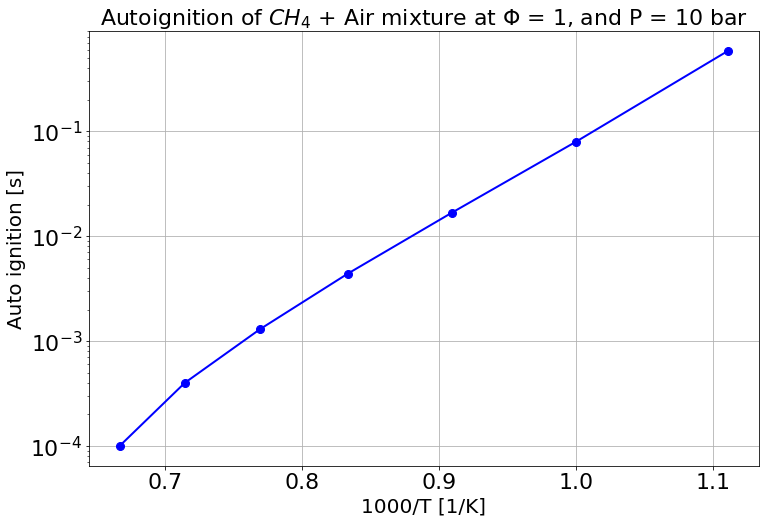

In [19]:
from matplotlib import pyplot as plt

#################################################################
# Plot results
#################################################################
# create plot
plt.figure(figsize=(12,8))
plt.plot(1000.0/np.array(Temperature_range[:-1]), auto_ignitions[:-1], 'b-o')
plt.xlabel(r'1000/T [1/K]', fontsize=20)
plt.ylabel("Auto ignition [s]", fontsize=20)
plt.yscale('log')
plt.title(r'Autoignition of $CH_{4}$ + Air mixture at $\Phi$ = 1, and P = 10 bar',
fontsize=22, horizontalalignment='center')
#plt.axis(fontsize=20)
plt.grid()
plt.show()

In [6]:
auto_ignitions

[0.5866999999999517,
 0.07970000000000126,
 0.016699999999999954,
 0.0043999999999999985,
 0.0013000000000000004,
 0.0004,
 0.0001,
 0.008200000000000006]

In [7]:
auto_ignitions

[0.5866999999999517,
 0.07970000000000126,
 0.016699999999999954,
 0.0043999999999999985,
 0.0013000000000000004,
 0.0004,
 0.0001,
 0.008200000000000006]

Text(0, 0.5, '$y_{CO}$')

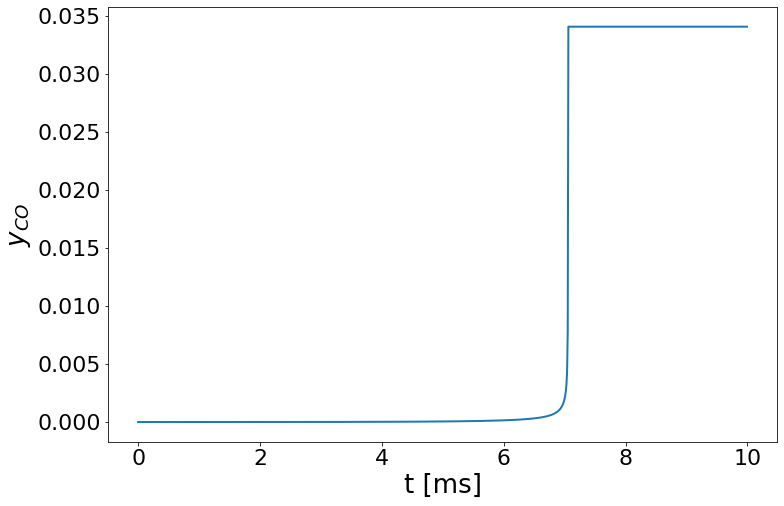

In [25]:
import pandas as pd

Data1 = pd.read_csv('/Users/sventuri/WORKSPACE/ROMNet/Autoignition_1/orig_data/y.csv.1')
Data2 = pd.read_csv('/Users/sventuri/WORKSPACE/ROMNet/Autoignition_1/orig_data_Cantera/y.csv.1')

# QOI   = 'T'

# plt.figure(figsize=(12,8))
# #plt.plot(Data1['t'], Data1[QOI])
# plt.plot(Data2['t'], Data2[QOI])
# plt.xlabel('t [ms]')
# plt.ylabel(r'T')

QOI   = 'CO'

plt.figure(figsize=(12,8))
#plt.plot(Data1['t'], Data1[QOI])
plt.plot(Data2['t'], Data2[QOI])
plt.xlabel('t [ms]')
plt.ylabel(r'$y_{'+QOI+'}$')

(0.0, 0.03)

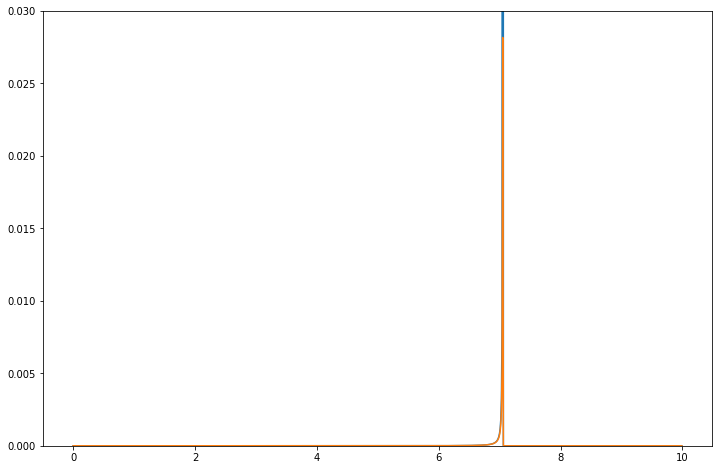

In [9]:
Data1 = pd.read_csv('/Users/sventuri/WORKSPACE/ROMNet/Autoignition_1/orig_data/ySource.csv.1')
Data2 = pd.read_csv('/Users/sventuri/WORKSPACE/ROMNet/Autoignition_1/orig_data_Cantera/ySource.csv.1')

plt.figure(figsize=(12,8))
plt.plot(Data1['t'], Data1['H2'])
plt.plot(Data2['t'], Data2['H2'])
plt.ylim([0,0.03])

In [20]:
temperature

[3146.761080622399,
 3138.4951982753937,
 3138.423612608803,
 3138.4230223738855,
 3138.42301746817,
 3138.4230174323266,
 3138.423017455128,
 3138.4230174368217,
 3138.423017449433,
 3138.423017478938,
 3138.4230174691597,
 3138.42301744023,
 3138.4230174298464,
 3138.4230174337913,
 3138.4230174364425,
 3138.4230174447075,
 3138.423017440061,
 3138.423017443809,
 3138.423017441976,
 3138.4230174655563,
 3138.4230174815893,
 3138.4230174507725,
 3138.423017443698,
 3138.4230174351455,
 3138.423017424524,
 3138.4230174246304,
 3138.4230174329737,
 3138.4230174373424,
 3138.4230174366826,
 3138.423017437429,
 3138.423017434518,
 3138.423017431621,
 3138.4230174321597,
 3138.423017429417,
 3138.4230174254985,
 3138.4230174258664,
 3138.4230174296667,
 3138.4230174262566,
 3138.423017424947,
 3138.423017431068,
 3138.4230174304803,
 3138.423017429991,
 3138.423017431185,
 3138.4230174331374,
 3138.423017433484,
 3138.4230174337267,
 3138.423017433886,
 3138.423017433868,
 3138.42301743374